In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/reviewsdata1/reviewcsv1.2.csv
/kaggle/input/raw-data/reviews_final.csv
/kaggle/input/reviewsdata/cleanreviews_pscore.csv


#### Libraries required to preprocess the data and perform analysis

In [49]:
import os
import pandas as pd
import numpy as np
import re
#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

#Scikit-Learn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Spell Correction
!pip install autocorrect
from autocorrect import Speller

#Tokenization
!pip install wordninja
import wordninja

#Necessary Libraries for plotting charts
import matplotlib.pyplot as plt
#plotly
!pip install plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

!pip install contractions
# contractions is a library for converting words like "I'm" to "I am"
import contractions

# Necessary Libraries to find similarity
import math
from collections import Counter

#### custom stop words list 

In [50]:
stopwordslist= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'into',
 'through',
 'during',
 'before',
 'after',
 'to',
 'from',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'ma']
# 
spell = Speller(lang='en')

# Data source

We have scraped data from Glassdoor for 4 different companies.
- Google
- Microsoft
- IBM
- Amazon

Below github link was used scrap data.
https://github.com/sagark93/Text-Analytics/blob/master/glassdoor_scrapping.ipynb

Referance: https://github.com/MatthewChatham/glassdoor-review-scraper

In [51]:
# loading the data extracted form the glassdoor into a pandas dataframe
df=pd.read_csv('../input/raw-data/reviews_final.csv', engine = 'python')
df.head()

AuthorLocation  \
0  Current Employee - Amazon Warehouse Worker�in ...   
1  Current Employee - Anonymous Employee�in Seatt...   
2  Current Employee - Senior Engineering Manager�...   
3  Current Employee - Software Development Manage...   
4  Current Employee - Software Development Manage...   

                                                Pros  \
0                            Its a great job to have   
1  Really smart people, a lot of opportunity for ...   
2  Jeff Bezos and his "S-Team" are brilliant and ...   
3  - You can learn a lot very quickly in a very s...   
4  I've been at Amazon for a month now, and I've ...   

                                                Cons ReviewDate  \
0                              Not much bad about it  27-Feb-20   
1  You have to be self motivated. NO ONE will hol...  10-Jan-16   
2  The management process is abusive, and I'm cur...  20-Feb-16   
3  - Can be overwhelming, very steep learning cur...   3-Dec-18   
4  No cons, so far - seriously. Like I said, I'm ...  23-Feb-18   

                                      ReviewMainText  \
0            I have been working at Amazon part-time   
1            I have been working at Amazon full-time   
2  I have been working at Amazon full-time for mo...   
3  I have been working at Amazon full-time for le...   
4  I have been working at Amazon full-time for le...   

                                         ReviewTitle  OverallRating company  
0                                     "FC Associate"              5  Amazon  
1                          "You Get What You Put In"              5  Amazon  
2                   "Exciting Work, Abusive Culture"              3  Amazon  
3  "Amazing company and the most driven and smart...              5  Amazon  
4                         "An Amazing Place to Work"              5  Amazon

In [52]:
## converting all the columns name to lower case for easy access
# df.columns = df.columns.str.lower()

In [53]:
## extracting employeestatus from  authorlocation
# for i in reviews.index:
#     if reviews.authorlocation[i].find('Former Employee') != -1:
#         reviews.loc[i,'employeestatus'] = 'Former Employee'
#     elif reviews.authorlocation[i].find('Current Employee') != -1:
#         reviews.loc[i,'employeestatus'] = 'Current Employee'
#     else:
#         reviews.loc[i,'employeestatus'] = 'Unknown'

In [54]:
## dropping authorjobrole, ReviewMainText consist 
## above columns dont make any contributions to actual review from the user

# df.drop(columns=['authorjobrole','reviewmaintext'],inplace=True, axis= 1)

In [55]:
## adding year and month 
# df['review_year'] = df.apply(lambda x:x['reviewdate'].year,axis=1)
# df['review_month'] = df.apply(lambda x:x['reviewdate'].month,axis=1)

In [56]:
## replace null values with empty string
## as we are considering pros,cons and reviewtitle to calculate polarity, we don't want to lose data

# def remove_null(text):
#     text = ''
#     return text

# #  replacing null values in pros and cons columns
# for i in df[df['pros'].isnull()]['pros'].index:
#     df.loc[i,'pros'] = remove_null(df.loc[i,'pros'])

# for i in df[df['cons'].isnull()]['cons'].index:
#     df.loc[i,'cons'] = remove_null(df.loc[i,'cons'])

In [57]:
# reviewcsv1.2.csv file is clean data file 
# this file is used to avoid rerun of preprocessing of data which is computationally heavy
df=pd.read_csv('../input/reviewsdata1/reviewcsv1.2.csv')

In [58]:
# replace null values with empty string
def remove_null(text):
    text = ''
    return text

#  repalcing null values in pros and cons columns
for i in df[df['cleanpros'].isnull()]['cleanpros'].index:
    df.loc[i,'cleanpros'] = remove_null(df.loc[i,'cleanpros'])

for i in df[df['cleancons'].isnull()]['cleancons'].index:
    df.loc[i,'cleancons'] = remove_null(df.loc[i,'cleancons'])

# Exploratory Data Analysis & Visualizations

### pie plot of Ratings distribution in reviews by company

In [59]:
company_names = df.companyname.unique()
def pieplotratingsdistribution(df,companyname):
    labels = df[df['companyname']==companyname]['overallrating'].value_counts().index
    values = df[df['companyname']==companyname]['overallrating'].value_counts().values
    title = 'Ratings distribution in reviews of {}'.format(companyname)
    trace = go.Pie(labels=labels, values=values, title = title)
    py.iplot([trace], filename='basic_pie_chart')
    

for name in company_names:
    pieplotratingsdistribution(df,name)

### Stacked bar chart employment status

In [60]:
def stackedbarplot(df):
    company_names=list(df['companyname'].unique())
    Employee_categories=list(df['authoremploymentstatus'].unique())
    count_list=[]
    for j in Employee_categories:
        for i in company_names:
            count_list.append(df[(df['companyname']==i)&(df['authoremploymentstatus']==j)].shape[0])
    temp=[]
    for i in range(0, len(count_list),len(company_names)):
        temp.append(list(count_list[i:i + len(company_names)]))
    data=[] 
    k=0
    for i in Employee_categories:
        data.append(go.Bar(name=i,x=company_names,y=temp[k]))
        k=k+1
    fig = go.Figure(data=data)
# Change the bar mode
    fig.update_layout(barmode='stack')
    fig.show()

stackedbarplot(df)

# Preprocessing of text data 

In [61]:
# lemmatizer = WordNetLemmatizer()
# # function to extract extract noun, adjective, verb and adverbs from the text
# # and tag pos for better lemmatization
# def get_wordnet_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

# # preprocessing of text
# def text_preprocess(text):
#     if (len(text)>0):
#         # contractions is a library for converting words like "I'm" to "I am"
#         text=contractions.fix(text)
        
#         #Removing all the special characters from the review text
#         for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t1234567890':
#             text = str(text).replace(char, ' ')
            
#         #Converting all the words in review into lower case
#         text=text.lower()
        
#         #splitting the words in a sentence.
#         word_list = wordninja.split(text)
        
#         #removing stopwords from customzied stopwordlists 
#         #and considering only word of length greater than 2
#         word_list=[spell(w) for w in word_list if w not in stopwordslist and len(w) > 2]
        
# #       extract noun, adjective, verb and adverbs from the text and perform lemmatizton   
#         lemmatized_text=' '.join(([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]))
        
#         return lemmatized_text
#     else:
#         return ''

In [62]:
# # cleaning the pros, cons and reviewTitle
# df['cleanpros'] = df['pros'].apply(lambda text: text_preprocess(text))
# df['cleancons'] = df['cons'].apply(lambda text: text_preprocess(text))
# df['cleantitle'] = df['reviewtitle'].apply(lambda text: text_preprocess(text))

In [63]:
# #Combing all the clean text information given by the user
# df['cleantext'] = df[['cleanpros', 'cleancons','cleantitle']].apply(lambda x: ' '.join(x), axis=1)

In [64]:
# # Perform sentiment analysis on cleantext

# analyzer=SentimentIntensityAnalyzer()
# def polarity_score(text):
#     if len(text)>0:
#         score=analyzer.polarity_scores(text)['compound']
#         return score
#     else:
#         return 0
# df['polarityscore'] =df['cleantext'].apply(lambda text : polarity_score(text)) 

### Plotting Word Count distribution bar plot

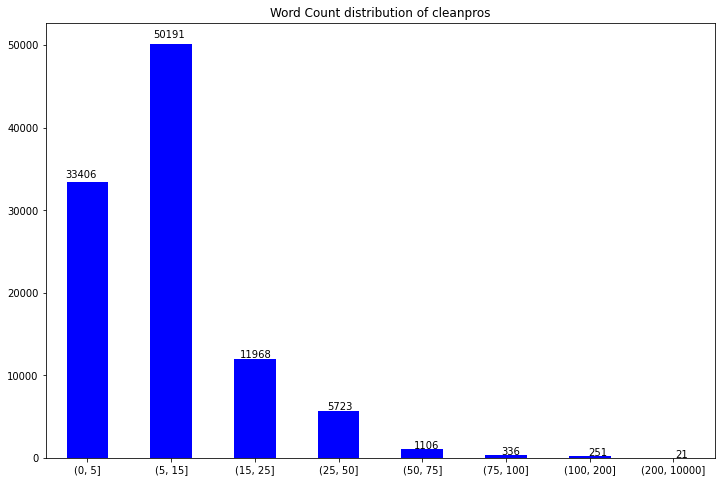

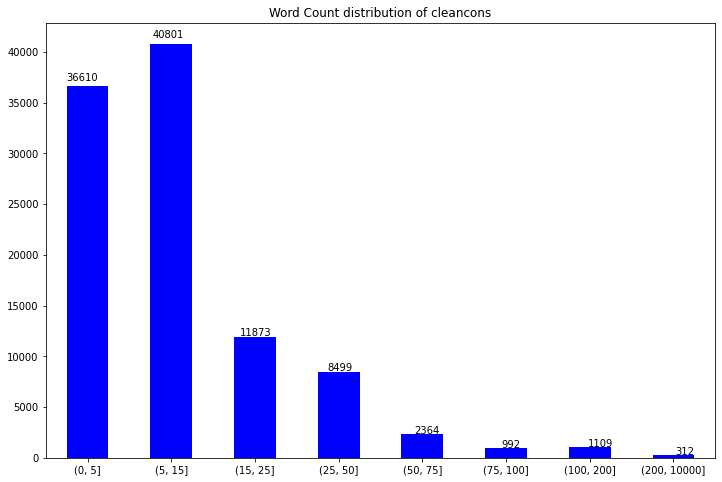

In [65]:
def plotwordcountdistribution(df,reviewtype):
    #reviewtyepe is 'Pros_Modified_Text','Cons_Modified_Text' in our case
    def comment_len(x):
        if type(x) is str:
            return len(x.split())
        else:
            return 0
    df['review_len'] = df[reviewtype].apply(comment_len)
    length_scale=[0,5,15,25,50,75,100,200,10000]#Change length scale according to your requirement
    out = pd.cut(df['review_len'],length_scale)
    ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,8))
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.040, p.get_height() * 1.015))
    plt.title('Word Count distribution of {}'.format(reviewtype))
    plt.show()
    df.drop(columns=['review_len'])
    
plotwordcountdistribution(df,'cleanpros')
plotwordcountdistribution(df,'cleancons')

### Sentiment score anamolies

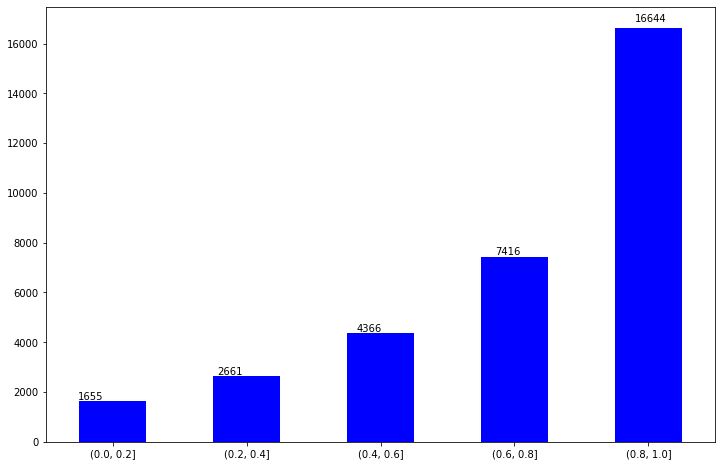

In [66]:
def sentianamolybarplot(df):
    polarity_scale=[0.0,0.2,0.4,0.6,0.8,1]
    #'Review_polarity' is column name of sentiment score calculated for whole review.
    df2=df[(df['polarityscore']>0)&(df['overallrating']<=3)]
    out = pd.cut(df2['polarityscore'],polarity_scale)
    ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,8))
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.040, p.get_height() * 1.015))
    plt.show()
sentianamolybarplot(df)

### Distribution of polarity score

In [67]:
def polarityscorehistplot(df,companyname):
#     df['Review_polarity'] = df['Pros'].map(lambda text: TextBlob(text).sentiment.polarity)
    fig = px.histogram(df, x='polarityscore')
    fig.update_layout(title_text='Distribution of sentiment polarity in Reviews {}'.format(companyname), template="plotly_white")
    fig.show()

for name in company_names:
    polarityscorehistplot(df,name)

# Text Analytics

### Defining n trigrams

In [68]:
def top_n_trigram(corpus):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

### Defining n bigrams

In [69]:
def top_n_bigram(corpus):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

### extracting trigrams from clean pros and cons text

In [70]:
company_names = df.companyname.unique()

dict_trigrams_pros= {}
dict_trigrams_cons= {}

for name in company_names:
    dict_trigrams_pros[name] = top_n_trigram(df[df['companyname']==name]['cleanpros'])

for name in company_names:
    dict_trigrams_cons[name] = top_n_trigram(df[df['companyname']==name]['cleancons'])

### Bar plot of top 20 trigrams 

In [71]:
def bar_plot_toptrigrams(trigrams, reviewtype = 'Pros'):
    for companyname in trigrams:
        common_words = trigrams[name][:20]
        df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
        fig = px.bar(df1, x='word', y='count')
        fig.update_layout(title_text= '{0} Review Tri-gram count top 20 for {1}'.format(reviewtype, companyname), template="plotly_white")
        fig.show()

bar_plot_toptrigrams(dict_trigrams_pros)
bar_plot_toptrigrams(dict_trigrams_cons,'Cons') 

### Extracting trigrams from clean pros and cons text

In [ ]:
dict_bigrams_pros= {}
dict_bigrams_cons= {}

for name in company_names:
    dict_bigrams_pros[name] = top_n_bigram(df[df['companyname']==name]['cleanpros'])

for name in company_names:
    dict_bigrams_cons[name] = top_n_bigram(df[df['companyname']==name]['cleancons']) 

### Bar plot of top 20 Bigrams 

In [ ]:
def bar_plot_topbigrams(bigrams, reviewtype = 'Pros'):
    for companyname in bigrams:
        common_words = bigrams[name][:20]
        df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
        fig = px.bar(df1, x='word', y='count')
        fig.update_layout(title_text= '{0} Review Bi-gram count top 20 for {1}'.format(reviewtype, companyname), template="plotly_white")
        fig.show()

bar_plot_topbigrams(dict_bigrams_pros)
bar_plot_topbigrams(dict_bigrams_cons,'Cons')    

#### number of negative trigrams

In [ ]:
for key in dict_trigrams_cons:
    print(key,len(dict_trigrams_cons[key]))

####  number of postive trigrams

In [ ]:
for key in dict_trigrams_pros:
    print(key,len(dict_trigrams_pros[key]))

### function to find similarity between two trigrams and bigrams

In [ ]:
def cosine_similarity_grams(a, b):
    vec1 = Counter(a)
    vec2 = Counter(b)

    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    return float(numerator) / denominator
# Ref : https://gist.github.com/gaulinmp/da5825de975ed0ea6a24186434c24fe4

### function to find a list of unique grams and find grams which are similar to unique grams

In [ ]:
# create of list of 100 trigrams for each company
def check_similarity(dict_grams):
    top_grams = {}
    for key in dict_grams:
#         consider top 100 grams for each comapny
        top_100 = dict_grams[key][:100]
        top_similar = {}
        top = []
        for i in top_100:
            for j,val in enumerate(top_100):
#    check similarity between two grams
                if cosine_similarity_grams(i[0],val[0]) > 0.65:
#     calculate total freq of similar words
                    freq = i[1] + val[1]
#     collect all the simialr gram in a list
                    if i[0] not in top_similar:
                        top_similar[i[0]] = []
                    top_similar[i[0]].append(val[0])
#    delete grams which is simialar 
                    del top_100[j]
            top.append((i[0],freq))
#       collect all the top grams into a dictionary 
        top_grams[key] = top
#       collect all the similar grams 
        top_grams[str(key)+str('_similar')] = top_similar
    return top_grams

### extracting top trigrams and similar trigrams for pros and cons

In [ ]:
top_pros_trigrams = check_similarity(dict_trigrams_pros)
top_cons_trigrams = check_similarity(dict_trigrams_cons)

### extracting top bigrams and similar trigrams for pros and cons

In [ ]:
top_pros_bigrams = check_similarity(dict_bigrams_pros)
top_cons_bigrams = check_similarity(dict_bigrams_cons)

In [ ]:
# import bz2
# import pickle

# sfile = bz2.BZ2File('cleanreviews', 'w')
# pickle.dump(df, sfile)

### find the average polarity of unique grams and sort by average polarity

In [ ]:
# sort the kewyword list 
def sortlist(keywords_list):
    keywords_list =sorted(keywords_list, key = lambda x: x[2], reverse=True)
    return keywords_list

# find the average polarity of unique grams
def avgpolarity(name, trigrams, col='cleancons'):
    grp = df[df['companyname'] == name]
    lst = []
    for keyword in  trigrams[name]:
#         print(keyword[0] ,grp.loc[grp['cleanpros'].str.contains(keyword[0])]['polarityscore'].mean())
        lst.append((keyword[0],keyword[1],grp.loc[grp[col].str.contains(keyword[0])]['polarityscore'].mean()))
#     print(sortlist(lst))
    return sortlist(lst)

#### calculate average rating for bigrams and trigrams of cons

In [ ]:
top5_cons_bigrams = {}
top5_cons_trigrams = {}
for name in company_names:
    top5_cons_bigrams[name] = avgpolarity(name,top_cons_bigrams)
    top5_cons_trigrams[name] = avgpolarity(name,top_cons_trigrams)

#### calculate avgrage rating for bigrams and trigrams of pros

In [ ]:
top5_pros_bigrams = {}
top5_pros_trigrams = {}
for name in company_names:
    top5_pros_bigrams[name] = avgpolarity(name,top_pros_bigrams,'cleanpros')
    top5_pros_trigrams[name] = avgpolarity(name,top_pros_trigrams,'cleanpros')

### printing top bigrams in pros with frequency and average polarity

In [ ]:
top5_pros_bigrams

### printing top bigrams in cons with frequency and average polarity

In [ ]:
top5_cons_bigrams

### printing top Trigrams in cons with frequency and average polarity

In [ ]:
top5_cons_trigrams

### printing top Trigrams in cons with frequency and average polarity

In [ ]:
top5_pros_trigrams

#### simialar words in top trigrams (pros)

In [ ]:
for name in company_names:
    print(name)
    print(top_pros_trigrams[str(name) +'_similar'])

#### simialar words in top trigrams (cons)

In [ ]:
for name in company_names:
    print(name)
    print(top_cons_trigrams[str(name) +'_similar'])

#### simialar words in top bigrams (pros)

In [ ]:
for name in company_names:
    print(name)
    print(top_pros_bigrams[str(name) +'_similar'])

#### simialar words in top bigrams (cons)

In [ ]:
for name in company_names:
    print(name)
    print(top_cons_bigrams[str(name) +'_similar'])

# Results : Dashboard in Tableau

https://public.tableau.com/profile/sagar.surendra.kulkarni#!/vizhome/Text_Analytics/Dashboard1